In [1]:
import torch
import torchvision
import dataloader2
import matplotlib.pyplot as plt
import imageio
import numpy as np

In [2]:
ds = dataloader2.adobe240_dataset()
dl = torch.utils.data.DataLoader(ds)

In [3]:
for (x1, x2), y in dl:
    break
    

In [4]:
x1.is_contiguous()

True

In [5]:
x1.permute(0,3,1,2).is_contiguous()

False

### random horizontal/vertical flip

In [42]:
%%time
a1 = x1.flip(dims=[0,1])

Wall time: 22.9 ms


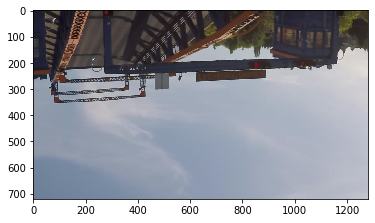

In [40]:
plt.imshow(a1.squeeze(0).int())

### random sample

In [9]:
img1 = imageio.imread('E:/scriptieAI/created_datasets/ADOBE240/720p_240fps_1__0_0.jpeg')
img2 = imageio.imread('E:/scriptieAI/created_datasets/ADOBE240/720p_240fps_1__0_4.jpeg')

In [10]:
img1 = torch.from_numpy(np.array(img1))
img2 = torch.from_numpy(np.array(img2))

In [11]:
X = torch.stack([img1, img2], axis=0)

In [19]:
X1, X2 = X.unbind(dim=0)

In [20]:
X1.shape

torch.Size([720, 1280, 3])

In [198]:
X.shape

torch.Size([2, 720, 1280, 3])

In [121]:
Y = X.flip(dims=[])

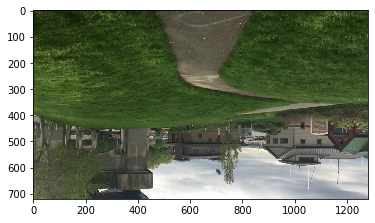

In [116]:
plt.imshow(Y[1])

In [68]:
# transforms
toPil = torchvision.transforms.ToPILImage()
rCrop = torchvision.transforms.RandomCrop(size=(128,128))

In [56]:
img1 = toPil(img1)
img2 = toPil(img2)

In [81]:
rCrop.get_params(img1, output_size=(128,128))

(136, 1077, 128, 128)

In [94]:
c = np.random.rand(2)
c

array([0.85231664, 0.66623759])

In [98]:
c < [0.4, 0.4]

array([False, False])

In [122]:
X.shape

torch.Size([2, 720, 1280, 3])

In [125]:
h_flip = True
v_flip= False

In [131]:
H = 720
W = 1280

In [133]:
crop_start = [np.random.randint(0, H-128),np.random.randint(0, W-128)]

In [134]:
crop_start

[177, 874]

In [30]:
np.random.randint(4)

3

In [34]:
class Transformer():
    
    def __init__(self, h_flip_prob = 0.1, v_flip_prob = 0.1, random_crop=True, crop_size=(128,128)):
        self.h_flip_prob = h_flip_prob
        self.v_flip_prob = v_flip_prob
        self.random_crop = random_crop
        self.crop_size = crop_size

    def apply_tensor(self, X):
        B, H, W, C = X.shape
        
        # horizontal flip
        h_flip, v_flip = np.random.rand(2) < [self.h_flip_prob, self.v_flip_prob]
        
        dims_to_flip = []
        if h_flip: dims_to_flip.append(1)
        if v_flip: dims_to_flip.append(2)
        
        X = X.flip(dims=dims_to_flip)
        
        # random crop
        if self.random_crop:
            crop_start_h, crop_start_w = [np.random.randint(0, H-self.crop_size[0]),np.random.randint(0, W-self.crop_size[1])]
            crop_end_h, crop_end_w = crop_start_h+self.crop_size[0], crop_start_w+self.crop_size[1]
            X = X[:, crop_start_h:crop_end_h, crop_start_w:crop_end_w, :]

        return X
        
    def apply(self, input_frames, label):
        '''
        expects input frames as list of tensors HxWxC and label seperately
        '''
        X = torch.stack([*input_frames, label], axis=0)
        
        X = self.apply_tensor(X)
            
        X = X.unbind(dim=0)
        
        input_frames, y = X[:-1], X[-1]
            
        return input_frames, y

In [39]:
t = Transformer(crop_size=(256,512))

In [40]:
Y = t.apply_tensor(X)

In [41]:
X.shape

torch.Size([2, 720, 1280, 3])

In [48]:
X[0].unsqueeze(dim=0).shape

torch.Size([1, 720, 1280, 3])

In [3]:
dl = torch.utils.data.DataLoader(dataloader2.adobe240_dataset(transformer=Transformer()))

In [4]:
for (x1, x2), y in dl:
    break

[]


In [17]:
(x1[0] == y[0]).float().mean()

tensor(0.0733)

In [22]:
R = torch.stack([x1, x2, y])

In [24]:
R = R.squeeze(1)

In [26]:
R.split()

TypeError: split() missing 1 required positional argument: 'split_size'